<a href="https://colab.research.google.com/github/DrDAN6770/DataSciense-with-Python/blob/main/%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E5%B7%A5%E5%85%B7%E7%AE%B1/%E7%A4%BE%E7%BE%A4%E5%85%B1%E5%AD%B8/Task%2005/Task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Module

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

In [ ]:
df_train = df.copy()

In [ ]:
# 欄位刪除
df_train = df_train.drop(['Ticket', 'PassengerId', 'Cabin'], axis=1)

# Title handle

In [ ]:
# 頭銜(title)處理
df_train['Title'] = df_train['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())
df_train['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [ ]:
title_Classify = {
           'Sir' : 'Royalty',   #王室
           'Jonkheer' : 'Royalty',#王室
           'the Countess' : 'Royalty',#王室
           'Lady' : 'Royalty',  #王室
           'Capt' : 'official',  #船長
           'Col' : 'official',  #上校
           'Major' : 'official', #市長
           'Don' : 'official',  #大學教師
           'Rev' : 'official',  #牧師
           'Dr' : 'official',  #醫生
           'Mlle' : 'Miss',  #未婚女子
           'Miss' : 'Miss',  #未婚女子
           'Mme' : 'Mrs',   #已婚女性
           'Mrs' : 'Mrs',   #已婚女性
           'Ms' : 'Mrs',   #未婚、已婚女子
           'Mr' : 'Mr',    #男士
           'Master' : 'Master',  #專家
           'Rev' : 'official',  #牧師
}
df_train['Title'] = df_train['Title'].replace(title_Classify)
df_train['Title'].value_counts()

Title
Mr          517
Miss        184
Mrs         127
Master       40
official     19
Royalty       4
Name: count, dtype: int64

In [ ]:
# 刪除Name欄位
df_train = df_train.drop(['Name'], axis=1)

# Missvalues handle

In [ ]:
# Embarked眾數填補缺失
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

In [ ]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,official
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [ ]:
# Age填補missing values by group sex、title、pclass median
age_median = df_train.pivot_table(values='Age', index=['Sex', 'Title', 'Pclass'], aggfunc='median')
age_median

Age
Sex    Title    Pclass      
female Miss     1       30.0
                2       24.0
                3       18.0
       Mrs      1       40.0
                2       31.5
                3       31.0
       Royalty  1       40.5
       official 1       49.0
male   Master   1        4.0
                2        1.0
                3        4.0
       Mr       1       40.0
                2       31.0
                3       26.0
       Royalty  1       43.5
       official 1       50.0
                2       46.5

In [ ]:
age_median = df_train.groupby(['Sex', 'Title', 'Pclass'])['Age'].transform('median')
df_train['Age'] = df_train['Age'].fillna(age_median)

In [ ]:
# Sec轉數字
df_train['Sex'] = df_train['Sex'].replace({'male': 0, 'female': 1})

In [ ]:
# Embarked轉one-hot encode
df_train = pd.get_dummies(df_train)

In [ ]:
# Pclass轉one-hot encode
Pclass_encode = pd.get_dummies(df_train['Pclass'], prefix = 'Pclass')
df_train = df_train.drop(['Pclass'], axis=1)

# Faimly handle

In [ ]:
def plot_corr(dataframe, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(dataframe, hue = target, aspect=4, row = row, col = col)
    facet.map(sns.kdeplot, var, shade= True)
    facet.set(xlim=(0 , dataframe[var].max()))
    facet.add_legend()
    plt.show()

# plot_corr(df_train, var = 'Familysize', target='Survived')

# 處理家人
def family_handle(dataframe):
    dataframe['Familysize'] = dataframe['SibSp'] + dataframe['Parch'] + 1
    dataframe['Singe'] = dataframe['Familysize'].map(lambda x:1 if x == 1 else 0)
    dataframe['SmallFamily'] = dataframe['Familysize'].map(lambda x:1 if 2 <= x <= 4 else 0)
    dataframe['LargeFamily'] = dataframe['Familysize'].map(lambda x:1 if 5 <= x else 0)

    dataframe['Familysize_encode'] = dataframe['Familysize'].map(lambda x: 3 if 1 <= x <= 3 else (2 if 4 <= x <= 6 else 1))

    return dataframe
df_train = family_handle(df_train)

# StandardScaler

In [ ]:
# 標準化 年齡、價錢
from sklearn.preprocessing import StandardScaler
sz = StandardScaler()
df_train['Age'] = sz.fit_transform(df_train[['Age']])
df_train['Fare'] = sz.fit_transform(df_train[['Fare']])
df_train['Familysize_encode'] = sz.fit_transform(df_train[['Familysize_encode']])

# LogisticRegression

In [ ]:
df_train.drop(['SibSp', 'Parch', 'Singe', 'SmallFamily', 'LargeFamily', 'Familysize'], axis=1, inplace=True)

train_X = df_train.iloc[:,1:]
train_y = df_train['Survived']
# 迴歸 & 交叉驗證
log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.82681564 0.8258427  0.79213483 0.7752809  0.85955056]
0.8159249262444291


# 不同模型

In [ ]:
def score(model, x, y):
    return cross_val_score(model,x ,y ,cv=5,scoring='accuracy').mean()

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
log = LogisticRegression(random_state=0, max_iter=3000)
logcv = LogisticRegressionCV(random_state=0, max_iter=3000)
svc = SVC(random_state=0)
decisiontree = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors = 3)
gaussian = GaussianNB()
rf = RandomForestClassifier(n_estimators=100)
models = [log, logcv, svc, decisiontree, knn, gaussian, rf]

In [ ]:
model_names = ['Logistic Regression', 'Logistic Regression CV', 'SVC', 'Decision Tree', 'KNN', 'Gaussian Naive Bayes', 'Random Forest']
res = []

for model, name in zip(models, model_names):
    res.append({'Model': name, 'Average Score': score(model, train_X, train_y)})

res = pd.DataFrame(res)
res.sort_values('Average Score', ascending=False)

,Model,Average Score
2,SVC,0.820413
1,Logistic Regression CV,0.817049
0,Logistic Regression,0.815925
4,KNN,0.794614
6,Random Forest,0.786780
5,Gaussian Naive Bayes,0.780008
3,Decision Tree,0.776612


In [ ]:
from sklearn.model_selection import GridSearchCV
svc = SVC()
Parameters =[{
            'random_state':[0],
            'C' : [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
            'gamma' : [0.01, 0.05, 0.1, 0.5, 1],
            'kernel' : ['rbf']},
            {
            'C':[1,2,3,4,5,6,7,8,9,10],
            'kernel':['linear']}]

clf= GridSearchCV(svc, Parameters, cv = 5, n_jobs = 6)
clf.fit(train_X, train_y)
svc_opt = score(clf, train_X, train_y)
print(clf.best_params_) # {'C': 5, 'gamma': 0.05, 'kernel': 'rbf'}
print(svc_opt) # 0.8204004770573097

{'C': 1.5, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 0}
0.8114242671520934


In [ ]:
rf = RandomForestClassifier()
Parameters ={
            'max_depth' : [4, 6, 8],
            'n_estimators': [100, 50, 10],
            'max_features': ['sqrt', 'auto', 'log2'],
            'min_samples_split': [2, 3, 10],
            'min_samples_leaf': [1, 3, 10],
            'bootstrap': [True, False]}
rf = GridSearchCV(rf, Parameters,cv = 5)
rf_opt = score(rf,train_X,train_y)
# rf.fit(train_X, train_y)
# rf.best_params_
# '''
# {'bootstrap': False,
#  'max_depth': 6,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 10,
#  'min_samples_split': 3,
#  'n_estimators': 10}
# '''

## 不同模型的結果

In [ ]:
new_row = pd.DataFrame({'Model': ['SVC_opt', 'Random Forest_opt'], 'Average Score': [svc_opt, rf_opt]})
res = pd.concat([res, new_row], axis=0)
res.sort_values('Average Score', ignore_index = True, ascending=False)

,Model,Average Score
0,SVC,0.820413
1,Logistic Regression CV,0.817049
2,Logistic Regression,0.815925
3,SVC_opt,0.811424
4,Random Forest_opt,0.809183
5,KNN,0.794614
6,Random Forest,0.786780
7,Gaussian Naive Bayes,0.780008
8,Decision Tree,0.776612


# DL

## 分割train、test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2)

## tensorflow

In [ ]:
import tensorflow as tf
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=2)

## torch

In [ ]:
import torch
import torch.nn.functional as F
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden2 = torch.nn.Linear(hidden_size, hidden_size)
        self.predict = torch.nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        output1 = self.hidden1(x)
        output2 = self.hidden2(output1)
        output = F.softmax(self.predict(output2))
        return output

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)


# 模型、優化器初始化
model = Model(X_train.shape[1], 32, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.CrossEntropyLoss()

# 轉單一格式
X_train_float = X_train.values.astype(np.float32)
X_test_float = X_test.values.astype(np.float32)

# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train_float)
y_data = torch.tensor(y_train_onehot)
x_test_data = torch.tensor(X_test_float)
y_test_data = torch.tensor(y_test_onehot)

batch_size = 16
num_epochs = 100
num_batches = len(X_train) // batch_size
loss_list = []
test_loss_list = []

for epoch in range(num_epochs):
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        prediction = model(x_data[start:end])
        loss = loss_func(prediction, y_data[start:end])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss = loss_func(model(x_data), y_data)
    loss_list.append(loss.item())

    test_loss = loss_func(model(x_test_data), y_test_data)
    test_loss_list.append(test_loss.item())

    # print(loss)

print(' ===== done =====')

print(loss_list)
print(test_loss_list)

C:\Users\DAN\AppData\Local\Temp\ipykernel_23300\1147465860.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = F.softmax(self.predict(output2))


 ===== done =====
[0.7025721669197083, 0.6882405877113342, 0.6769742369651794, 0.6677899360656738, 0.659960925579071, 0.652960479259491, 0.6464017629623413, 0.6399949193000793, 0.6335216164588928, 0.6268247365951538, 0.6198063492774963, 0.6124283671379089, 0.6047108173370361, 0.5967276692390442, 0.5885984301567078, 0.5804771184921265, 0.5725353360176086, 0.5649407505989075, 0.5578356385231018, 0.5513204336166382, 0.5454480051994324, 0.5402268171310425, 0.5356307625770569, 0.5316113829612732, 0.5281085968017578, 0.5250588059425354, 0.5224012136459351, 0.5200795531272888, 0.518044650554657, 0.5162537097930908, 0.5146706104278564, 0.5132645964622498, 0.512009859085083, 0.5108849406242371, 0.5098717212677002, 0.5089550018310547, 0.5081220269203186, 0.5073620080947876, 0.506665825843811, 0.5060256123542786, 0.5054348111152649, 0.5048876404762268, 0.504379391670227, 0.503905713558197, 0.5034630298614502, 0.5030480027198792, 0.5026581287384033, 0.5022907853126526, 0.5019438862800598, 0.501615

Text(0, 0.5, 'BCE Loss')

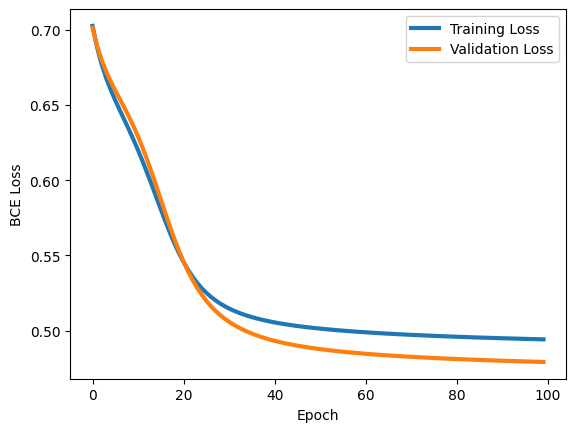

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list, linewidth=3)
plt.plot(test_loss_list, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

In [ ]:
x_test_data = torch.tensor(X_test_float)
y_pred = model(x_test_data)
y_pred = y_pred.argmax(1) # one hot array to int array
pytorch_method = accuracy_score(y_test, y_pred.detach().numpy()) # accuracy
pytorch_method

C:\Users\DAN\AppData\Local\Temp\ipykernel_23300\1147465860.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = F.softmax(self.predict(output2))


0.8379888268156425

In [ ]:
new_row = pd.DataFrame({'Model': ['Pytorch'], 'Average Score': [pytorch_method]})
res = pd.concat([res, new_row], axis=0)
res.sort_values('Average Score', ignore_index = True, ascending=False)

,Model,Average Score
0,Pytorch,0.837989
1,SVC,0.820413
2,Logistic Regression CV,0.817049
3,Logistic Regression,0.815925
4,SVC_opt,0.811424
5,Random Forest_opt,0.809183
6,KNN,0.794614
7,Random Forest,0.786780
8,Gaussian Naive Bayes,0.780008
9,Decision Tree,0.776612
